## Multidimensional Optimization
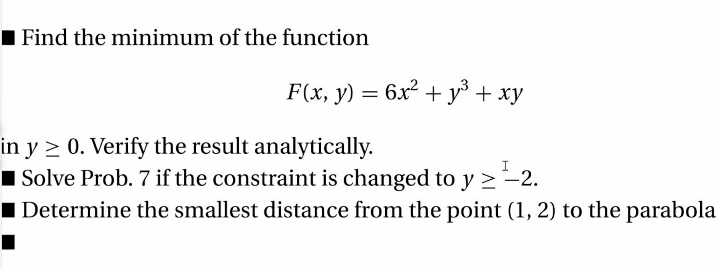

In [1]:
import numpy as np
from numpy.linalg import norm, solve, inv
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
# For plotting 3d graphs
def plot_surface(obj, fig, ax):
    nc = 100; nr = 100
    xlist = np.linspace(-5.0, 5.0, nc)
    ylist = np.linspace(-5.0, 5.0, nr)
    X, Y = np.meshgrid(xlist, ylist)
    Z = np.zeros((nr, nc))
    for i in range(nc):
        Z[:,i] = obj([X[:,i], Y[:,i]])
    ax.plot_surface(X, Y, Z)
    return
    
    
# For plotting contour lines / isoline
def plot_contour(obj, fig, ax):
    nc = 100; nr = 100
    xlist = np.linspace(-5.0, 5.0, nc)
    ylist = np.linspace(-5.0, 5.0, nr)
    X, Y = np.meshgrid(xlist, ylist)
    Z = np.zeros((nr, nc))
    for i in range(nc):
        Z[:,i] = obj([X[:,i], Y[:,i]])
    cp = ax.contour(X, Y, Z)
    #fig.colorbar(cp)
    return

[-0.00231484  0.02777809]
[-0.00231582  0.02778981]


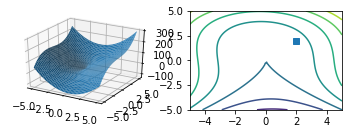

In [7]:
# 6x^2 + y^3 + xy (original function)
f = lambda x: 6*x[0]**2 + x[1]**3 + x[0]*x[1]

# Function for gradient
# 12x + y, 3y^2 + x (first deriv of x, first deriv of y)
g = lambda x: np.array([12*x[0] + x[1], 3*x[1]**2 + x[0]]) 

# Hessian matrix
# 12, 1
# 1, 6y
H = lambda x: np.array([[12, 1], [1, 6 * x[1]]])


xs = np.array([2.0, 2.0])
x0 = np.array([10, 10])


# Newton function to find minimum peak
def newton(f, g, H, x0):
    x = x0
    while 1:
        # x = x - inv(H(x)).dot(g(x)) # slower
        x = x - solve(H(x), g(x)) # faster
        if norm(g(x)) < 1.0E-6: break
    return x


# Finding the steepest descent
def steepest(f, g, x0):
    x = x0
    alpha = 0.01
    while 1:
        x = x - alpha * g(x)
        if norm(g(x)) < 1.0E-6: break
    return x


# Plotting graph
fig = plt.figure(1, figsize = (16,9)); plt.clf()
ax1 = fig.add_subplot(221, projection='3d')
plot_surface(f, fig, ax1)

ax2 = fig.add_subplot(222)
plot_contour(f, fig, ax2)
ax2.plot(xs[0], xs[1], 's')

In [4]:
#